In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from operator import attrgetter
import matplotlib.colors as mcolors
from sklearn.linear_model import LogisticRegression

# Q1

In [3]:
df=pd.read_csv('Data analyst Task-Question 1 Info.csv')
df['created_at']=pd.to_datetime(df['created_at'])

In [4]:
df

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
1,2,2,2021-05-09,0,NaN,20000
2,3,3,2021-05-09,10000,1.0,14000
3,4,4,2021-11-10,0,NaN,15000
4,5,5,2021-11-10,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000
29053,29054,9985,2022-07-31,0,NaN,25000
29054,29055,8843,2022-07-31,6000,1.0,24000
29055,29056,8703,2022-07-31,0,NaN,40000


In [5]:
n_orders = df.groupby(['user_id'])['order_id'].nunique()
first_order = df.groupby('user_id')['discount_type'].min()
total_order= df.groupby('user_id')['basket'].sum()
total_discount = df.groupby('user_id')['discount_cost'].sum()
mult_orders_perc = np.sum(n_orders > 1) / df['user_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

44.51% of customers ordered more than once.


In [6]:
n_orders

user_id
1       4
2       2
3       4
4       3
5       2
       ..
9981    1
9982    1
9983    1
9984    1
9985    1
Name: order_id, Length: 9985, dtype: int64

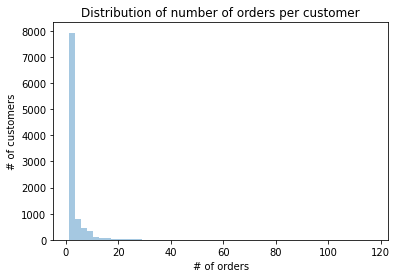

In [7]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [8]:
df['order_month'] = df['created_at'].dt.to_period('M')
df['cohort'] = df.groupby('user_id')['created_at'].transform('min').dt.to_period('M') 
df

,order_id,user_id,created_at,discount_cost,discount_type,basket,order_month,cohort
0,1,1,2021-04-12,10000,1.0,12000,2021-04,2021-04
1,2,2,2021-05-09,0,NaN,20000,2021-05,2021-05
2,3,3,2021-05-09,10000,1.0,14000,2021-05,2021-05
3,4,4,2021-11-10,0,NaN,15000,2021-11,2021-11
4,5,5,2021-11-10,10000,1.0,16000,2021-11,2021-11
...,...,...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000,2022-07,2022-05
29053,29054,9985,2022-07-31,0,NaN,25000,2022-07,2022-07
29054,29055,8843,2022-07-31,6000,1.0,24000,2022-07,2022-07
29055,29056,8703,2022-07-31,0,NaN,40000,2022-07,2022-07


In [9]:
df_cohort = df.groupby(['cohort', 'order_month']).agg(n_customers=('user_id', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort

,cohort,order_month,n_customers,period_number
0,2021-04,2021-04,1,0
1,2021-04,2022-03,1,11
2,2021-04,2022-05,1,13
3,2021-05,2021-05,2,0
4,2021-05,2022-03,1,10
5,2021-05,2022-06,1,13
6,2021-05,2022-07,1,14
7,2021-11,2021-11,2,0
8,2021-11,2022-01,1,2
9,2021-11,2022-03,1,4


In [10]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot#.iloc[:,0]

period_number,0,1,2,3,4,5,6,10,11,13,14
cohort,,,,,,,,,,,
2021-04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2021-05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2021-11,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2022-01,1491.0,457.0,365.0,378.0,316.0,317.0,324.0,NaN,NaN,NaN,NaN
2022-02,1539.0,385.0,393.0,362.0,354.0,337.0,NaN,NaN,NaN,NaN,NaN
2022-03,1255.0,305.0,274.0,259.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04,1592.0,421.0,389.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05,1192.0,352.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06,1396.0,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,10,11,13,14
cohort,,,,,,,,,,,
2021-04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2021-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,0.5,0.5
2021-11,1.0,NaN,0.500000,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN
2022-01,1.0,0.306506,0.244802,0.253521,0.211938,0.212609,0.217304,NaN,NaN,NaN,NaN
2022-02,1.0,0.250162,0.255361,0.235218,0.230019,0.218973,NaN,NaN,NaN,NaN,NaN
2022-03,1.0,0.243028,0.218327,0.206375,0.219920,NaN,NaN,NaN,NaN,NaN,NaN
2022-04,1.0,0.264447,0.244347,0.245603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05,1.0,0.295302,0.240772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06,1.0,0.290115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


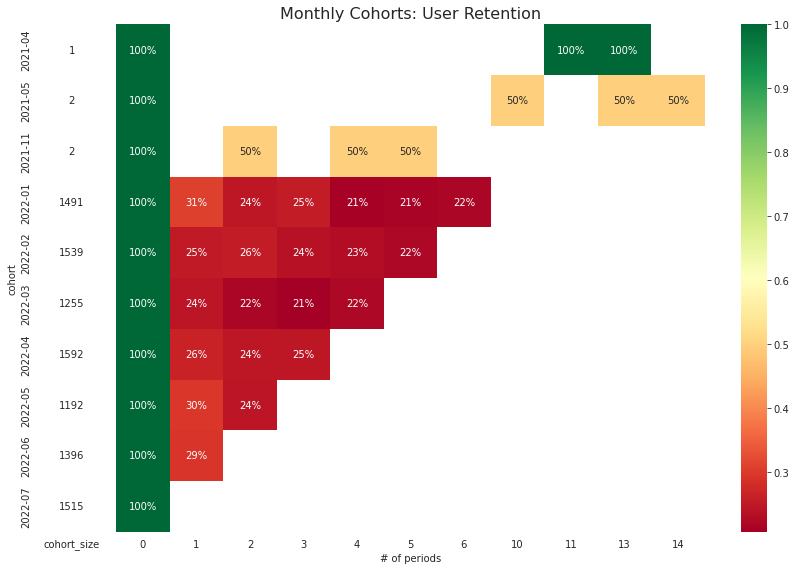

In [11]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [12]:
first_order

user_id
1       1.0
2       NaN
3       1.0
4       NaN
5       1.0
       ... 
9981    1.0
9982    NaN
9983    NaN
9984    NaN
9985    NaN
Name: discount_type, Length: 9985, dtype: float64

In [13]:
result = pd.merge(n_orders, first_order, left_index=True, right_index=True, suffixes=('_total', '_first'))
result = pd.merge(result, total_order, left_index=True, right_index=True, suffixes=('_total', '_first'))
result = pd.merge(result, total_discount, left_index=True, right_index=True, suffixes=('_total', '_first'))
result=result.rename({'order_id':'# of Orders','discount_type':'First Order Discount','basket':'Total Value of Orders','discount_cost':'Total Discount Received'},axis=1)
result.fillna(0,inplace=True)
result

,# of Orders,First Order Discount,Total Value of Orders,Total Discount Received
user_id,,,,
1,4,1.0,30200,10000
2,2,0.0,61000,0
3,4,1.0,63500,10000
4,3,0.0,69600,0
5,2,1.0,31500,18000
...,...,...,...,...
9981,1,1.0,24000,10000
9982,1,0.0,30000,0
9983,1,0.0,21000,0


In [14]:
correlation = result['# of Orders'].corr(result['First Order Discount'])
print(f"Correlation between # of Orders and First Order Discount: {correlation:.4f}")
correlation = result['Total Value of Orders'].corr(result['First Order Discount'])
print(f"Correlation between Total Value of Orders and First Order Discount: {correlation:.4f}")
correlation = result['Total Discount Received'].corr(result['# of Orders'])
print(f"Correlation between Total Discount Received and # of Orders: {correlation:.4f}")

Correlation between # of Orders and First Order Discount: -0.0026
Correlation between Total Value of Orders and First Order Discount: -0.0146
Correlation between Total Discount Received and # of Orders: 0.1351


In [30]:
result['First Order Discount']=result['First Order Discount'].replace({2:1})
X = result[['# of Orders']]
y = result['First Order Discount']
model = LogisticRegression().fit(X, y)
model.predict_proba([[1]])

array([[0.50316286, 0.49683714]])

In [61]:
a=((retention_matrix.iloc[:,1]*cohort_pivot.iloc[:,1])/(cohort_pivot.iloc[:,1].sum())).sum()
print(f'The Expected Orders of Second Timers in August: {a}')

The Expected Orders of Second Timers in August: 0.27668136145395317


In [31]:

for j in range(2,n_orders.max()+1):
    ab=0
    counter=0
    for i in range(len(n_orders)):
        if n_orders.loc[i+1]>=j:
            ab=ab+(round((df[df['user_id']==i+1]['created_at'].iloc[j-1]-df[df['user_id']==i+1]['created_at'].iloc[j-2]).days/30))
            counter+=1
    print(f'The Average Waiting Time for Order Number {j} After Order {j-1}: {round(ab/counter,2)}')

The Average Waiting Time for Order Number 2 After Order 1: 0.96
The Average Waiting Time for Order Number 3 After Order 2: 0.63
The Average Waiting Time for Order Number 4 After Order 3: 0.52
The Average Waiting Time for Order Number 5 After Order 4: 0.45
The Average Waiting Time for Order Number 6 After Order 5: 0.34
The Average Waiting Time for Order Number 7 After Order 6: 0.36
The Average Waiting Time for Order Number 8 After Order 7: 0.27
The Average Waiting Time for Order Number 9 After Order 8: 0.28
The Average Waiting Time for Order Number 10 After Order 9: 0.18
The Average Waiting Time for Order Number 11 After Order 10: 0.17
The Average Waiting Time for Order Number 12 After Order 11: 0.16
The Average Waiting Time for Order Number 13 After Order 12: 0.15
The Average Waiting Time for Order Number 14 After Order 13: 0.13
The Average Waiting Time for Order Number 15 After Order 14: 0.12
The Average Waiting Time for Order Number 16 After Order 15: 0.09
The Average Waiting Time fo